# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # imported for plot formatting
import math

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head() # quick look at first five rows of dataframe data

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# print summary of a DataFrame including the index dtype 
# and column dtypes, non-null values and memory usage.
df.info()

# the summary indicates there are 130 rows and 3 columns
# and there are no null values that need to be addressed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


---------------------
# 1. Is the distribution of body temperatures normal?

- First, plot/graph the data for `'temperature'` to see if it appears to be normally distributed.

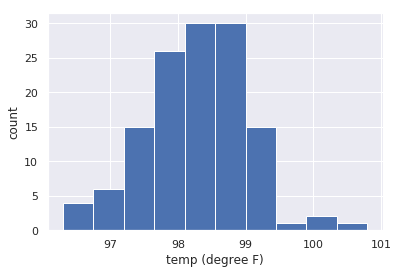

In [4]:
sns.set()  # use seaborn default settings for displaying plots

# plot a histogram using default number of bins with x-axis and y-axis labeled
_ = plt.hist(df['temperature'])
_ = plt.xlabel('temp (degree F)')
_ = plt.ylabel('count')

# dsiplay histogram
plt.show()

- #### The above histogram appears to be symmetric and unimodal, characteristics of a normal distribution

- However, because the number of bins is arbitrary and can impact the histogram due to binning bias, the same data may be interpreted differently depending on choice of bins. The "square root rule" (`sqrt(n)`) is a commonly-used rule of thumb for choosing number of bins.

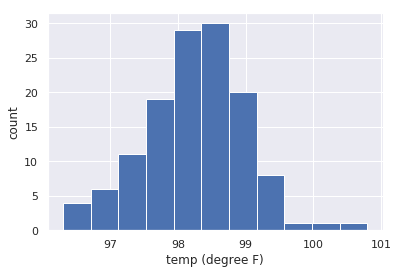

In [5]:
# compute number of bins using "square root rule"
n_bins = int(np.sqrt(len(df['temperature'])))

_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('temp (degree F)')
_ = plt.ylabel('count')
plt.show()

- #### The above histogram with an adjusted number of bins continues to appear symmetric and unimodal, characteristics of a normal distribution

- Additionally, we can apply the Empirical (68% - 95% - 99.7%) rule to see if the values lie within one, two, and three standard deviations, respectively, above or below the mean in a normal distribution.

In [6]:
# function to test empirical rule
def test_emp_rule(data, dist=1):
    """
    computes the percentage of values in list data that are 
    dist (1, 2, or 3) * data standard deviations from the data mean
       
    returns float   
    """
    count = 0
    d_std = np.std(data)
    d_mean = np.mean(data)
    
    for d in data:
        if d <= (d_mean + dist * d_std) and d >= (d_mean - dist * d_std):
            count += 1
    result = format((count/len(data))*100, '.1f')
    return result

temperatures = np.sort(df['temperature'])

# compute percent of temperatures that fall within 1 standard deviation of the sample mean
prcnt_1_std = test_emp_rule(temperatures)

# compute percent of temperatures that fall within 2 standard deviation of the sample mean
prcnt_2_std = test_emp_rule(temperatures, 2)

# compute percent of temperatures that fall within 3 standard deviation of the sample mean
prcnt_3_std = test_emp_rule(temperatures, 3)

# print results
print("\n******* Result ********\n")
print("Percent of temperatures that lie within 1, 2, and 3 standard deviations of sample mean.")
print("\tOne standard deviation:\t\t" + prcnt_1_std + '%')
print("\tTwo standard deviations:\t" + prcnt_2_std + '%')
print("\tThree standard deviations:\t" + prcnt_3_std + '%')
print("\n***********************\n")


******* Result ********

Percent of temperatures that lie within 1, 2, and 3 standard deviations of sample mean.
	One standard deviation:		69.2%
	Two standard deviations:	94.6%
	Three standard deviations:	99.2%

***********************



- The percent of temperatures appear to fit within the 68-95-99.7 Empirical rule.

In [7]:
# use stats normaltest(...) to test whether body temps differ from a normal distribution
statistic, pval = stats.normaltest(df['temperature'])

# set alpha
alpha = 0.05

print("\n******* Result ********\n")
print('Using the scipy.stats.normaltest(...) on the distribution of body temperatures, we compute:\n')
if(pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot rejct the null hypothesis. \nThus, the distribution is normal.'.format(round(pval,2), alpha))
else:
    print('The p-value ({}) is <= {}, so we can rejct the null hypothesis. \nThus, the distribution is not normal.'.format(round(pval,2), alpha))
print("\n***********************\n")


******* Result ********

Using the scipy.stats.normaltest(...) on the distribution of body temperatures, we compute:

The p-value (0.26) is > 0.05, so we cannot rejct the null hypothesis. 
Thus, the distribution is normal.

***********************



### Because the histogram appears to be symmetrical and unimodal, the data fits the Empirical rule, and we cannot reject the null hypothesis, we can say the body temperatures are normally distributed.
--------------------

----------------------------
# 2. Is the sample size large? Are the observations independent?

------
**Is the sample size large?**

In [8]:
df.groupby('gender')['temperature'].count()

gender
F    65
M    65
Name: temperature, dtype: int64

This data set consists of only 130 samples (65 male, 65 female) selected from a slightly larger data set of 148 subjects totaling 700 readings. While this is small compared to the human population, it is still considered to be a large sample size.

------
**Are the observations independent?**

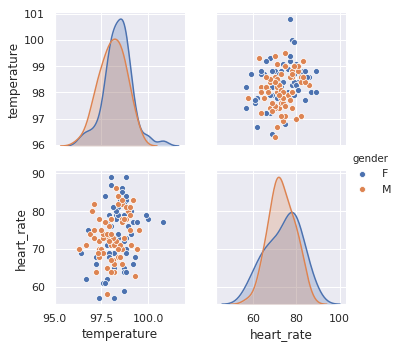

In [9]:
#sns.jointplot(x='temperature', y='heart_rate', data=df)
sns.pairplot(df, hue='gender')

When displaying `'temperature'` vs. `'heart_rate'` data based on `'gender'` in a scatterplot, visually, there does not appear to be any correlation, indicating the data is independent. 

In addition, when we consider the **'10% Rule'** of independence, 130 subjects is < 10% of the human population which further supports that the observations are in fact independent.

----------------------------
# 3. Is the true population mean really 98.6 degrees F?

* First, try a bootstrap hypothesis test.
* Next, try frequentist statistical testing. 
    * Would you use a one-sample or two-sample test? 
        * Why?
* In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
* Finally, try using the other test. 
    * How is the result be different? 
        * Why?

### Based on DataCamp's Statistical Thinking in Python 2 - Intro to Hypothesis Testing

**Pipeline for Hypothesis Testing includes:**
    * Clearly state the null hypothesis
    * Define your test statistic
    * Generate many sets of simulated data assuming the null hypothesis is true
    * Compute the test statistic for each simulated data set
    * The p-value is the fraction of the simulated data sets for which the test statistic is >= the real data

#### Bootstrap Hypothesis Test:
* $H_0: \mu = 98.6$
* $H_a: \mu \neq 98.6$
* Test Statistic = mean temperature

In [10]:
# define same functions from datacamp modules to generate bootstrap replicates
def bootstrap_replicate(data, func):
    """
    Generate bootstrap replicate data
    """
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """
    Draw bootstrap replicates
    """
    # initialize array of replicates
    bs_replicates = np.empty(size)
    # generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates

In [11]:
bs_reps = draw_bs_reps(df['temperature'], np.mean, 100000)

In [12]:
mu_mean = 98.6
p_val = ((bs_reps >= mu_mean)/len(bs_reps)).sum()

In [13]:
# set low alpha 
bs_alpha = 0.01

print("\n******* Result ********\n")
print('Using Bootstrap Hypothesis Testing, we compute:')
if(p_val > bs_alpha): 
    print('The p-value ({}) is > {}, based on these observations, we cannot reject the null hypothesis.'.format(p_val, bs_alpha))
else:
    print('The p-value ({}) is <= {}, based on these observations, we can reject the null hypothesis.'.format(p_val, bs_alpha))
print("\n***********************\n")


******* Result ********

Using Bootstrap Hypothesis Testing, we compute:
The p-value (0.0) is <= 0.01, based on these observations, we can reject the null hypothesis.

***********************



----
### Frequentist statistical testing

#### Would you use a one-sample or two-sample test? Why?

- Two-sample hypothesis testing is statistical analysis designed to test if there is a difference between two means from two different populations. In this case, we are working with a single population mean (98.6) and a sample mean and sample standard deviation. 
     
   **Because of this, we need to use a One-Sample Test.**

#### In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?

- A One-Sample Z-test is used when you have a normally distributed population and the σ is known. A One-Sample T-test is used when you have a normally distributed population and the σ is *not* known.

    **Because of this, we need to use the *t* statistic to determine whether the difference between the known population mean and sample mean is statistically significant or occurred by chance alone.**

---
**One-Sample using *t*-statistic**

In [14]:
# population mean
mu_mean = 98.6
# set alpha
alpha = 0.05
# use stats t-test for 1 sample to perform two-sided test for the null hypothesis that the 
# expected value (mean) of a sample of independent observations is equal to the given pop. mean
t_statistic, t_pval = stats.ttest_1samp(df['temperature'].values, mu_mean)

print("\n******* Result ********\n")
print('Using the scipy.stats.ttest_1samp(...) on body temperatures, we compute:\n')
t_stat = round(np.abs(t_statistic),2)
print('T-statistic = {}'.format(round(t_statistic,4)))
print('This indicates that the body temperatures are {} standard deviations from the pop. mean.'.format(t_stat))
print('p-value = {}\n'.format(t_pval))

if(t_pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(round(t_pval,8), alpha))
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(round(t_pval,8), alpha))
print("\n***********************\n")


******* Result ********

Using the scipy.stats.ttest_1samp(...) on body temperatures, we compute:

T-statistic = -5.4548
This indicates that the body temperatures are 5.45 standard deviations from the pop. mean.
p-value = 2.4106320415561276e-07

The p-value (2.4e-07) is <= 0.05, so we can reject the null hypothesis.

***********************



----
**One-Sample Test using *z*-statistic**

Z-Score Formula: Standard Error of the Mean

**`z` = (`x` – `μ`) / (`σ` / √`n`)**

Where:
* `x` = sample mean
* `μ` = population mean
* `σ` = sample standard deviation
* `n` = number of samples

In [15]:
# compute the standard error: SE = (σ / √n)
SE = np.std(df['temperature'].values) / np.sqrt(len(df['temperature'].values))

# compute the mean difference: MD = (x – μ)
MD = np.mean(df['temperature'].values) - mu_mean

# compute z-statistic
z_stat = round(MD / SE, 4)

# compute two-sided p-value for z-statistic
z_pval = stats.norm.sf(abs(z_stat))*2

In [16]:
print("\n******* Result ********\n")
print('Using the Z-score Formula for body temperatures, we compute:\n')
print('Z-statistic = {}'.format(z_stat))
print('This indicates that the body temperatures are {} standard deviations from the pop. mean.'.format(abs(z_stat)))
print('p-value = {}\n'.format(z_pval))
if(z_pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(round(z_pval,8), alpha))
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(round(z_pval,8), alpha))
print("\n***********************\n")


******* Result ********

Using the Z-score Formula for body temperatures, we compute:

Z-statistic = -5.4759
This indicates that the body temperatures are 5.4759 standard deviations from the pop. mean.
p-value = 4.352934723956801e-08

The p-value (4e-08) is <= 0.05, so we can reject the null hypothesis.

***********************



The t-stat and z-stat are both approximately -5 with P-value's near zero.
The temperatures would not be observed within 5 standard deviations of the population mean in both tests.

----

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

* **Which one is the correct one to use?**
    - When the sample size is >= 30, then it is okay to use z-statistic.
    - In this case, with a sample size = 10, we need to use the t-statistic.

In [17]:
# select random sample of 10 temperatures
np.random.seed(20)
rand_temps = np.random.choice(df['temperature'], size=10)

In [18]:
# population mean
mu_mean = 98.6
# set alpha
alpha = 0.05
# use stats t-test for 1 sample to perform two-sided test for the null hypothesis that the 
# expected value (mean) of 10 random observations is equal to the given pop. mean
t_rand_statistic, t_rand_pval = stats.ttest_1samp(rand_temps, mu_mean)

In [19]:
# compute the standard error: SE = (σ / √n)
rand_SE = np.std(rand_temps) / np.sqrt(len(rand_temps))

# compute the mean difference: MD = (x – μ)
rand_MD = np.mean(rand_temps) - mu_mean

# compute z-statistic
z_rand_stat = round(rand_MD / rand_SE, 4)

# compute two-sided p-value for z-statistic
z_rand_pval = stats.norm.sf(abs(z_rand_stat))*2

In [20]:
print("\n******* Result for t-test ********\n")
print('Using the scipy.stats.ttest_1samp(...) on 10 random body temperatures, we compute:\n')
t_rand_stat = round(np.abs(t_rand_statistic),2)
print('T-statistic = {}'.format(round(t_rand_statistic,4)))
print('This indicates that the 10 random body temperatures are {} standard deviations from the pop. mean.'.format(t_rand_stat))
print('p-value = {}\n'.format(t_rand_pval))

if(t_rand_pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(round(t_rand_pval,8), alpha))
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(round(t_rand_pval,8), alpha))
print("\n***********************\n")

print("\n******* Result for z-test ********\n")
print('Using the Z-score Formula for 10 random body temperatures, we compute:\n')
print('Z-statistic = {}'.format(z_rand_stat))
print('This indicates that the 10 random body temperatures are {} standard deviations from the pop. mean.'.format(abs(z_rand_stat)))
print('p-value = {}\n'.format(z_rand_pval))
if(z_rand_pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(round(z_rand_pval,8), alpha))
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(round(z_rand_pval,8), alpha))
print("\n***********************\n")


******* Result for t-test ********

Using the scipy.stats.ttest_1samp(...) on 10 random body temperatures, we compute:

T-statistic = -2.0239
This indicates that the 10 random body temperatures are 2.02 standard deviations from the pop. mean.
p-value = 0.0736624232263132

The p-value (0.07366242) is > 0.05, so we cannot reject the null hypothesis.

***********************


******* Result for z-test ********

Using the Z-score Formula for 10 random body temperatures, we compute:

Z-statistic = -2.1333
This indicates that the 10 random body temperatures are 2.1333 standard deviations from the pop. mean.
p-value = 0.03290012422638377

The p-value (0.03290012) is <= 0.05, so we can reject the null hypothesis.

***********************



* **What do you notice?**
    * For both tests, we get similar scores with the t-stat having a slightly lower score and higher p-value. 
    * In addition, at different significance levels, rejection of the null hypothesis varies:
        * significance level = 0.01
            - we cannot reject the null hypothesis for both tests
        * significance level = 0.05
            - we cannot reject the null hypothesis for t-test
            - we can reject the null hypothesis for the z-test
        * significance level = 0.10
            - we can reject the null hypothesis for both tests

* **What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic?**
    * When samples are smaller than 30, the distribution is no longer a normal distribution and instead becomes a t-distribution. 

---
# 5. At what temperature should we consider someone's temperature to be "abnormal"?

**As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.**

* **Start by computing the margin of error and confidence interval.**
    
    When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [21]:
# compute the margin of error (similar as before but for specific confidence level)
# set confidence levels for 68%, 95%, and 99% using standard probability table 
cl_list = [1.0, 1.96, 2.576]
prcnt_list = [68, 95, 99]

# compute the standard error: SE = (σ / √n)
SE = round(np.std(df['temperature'].values) / np.sqrt(len(df['temperature'].values)), 3)

bs_reps = draw_bs_reps(df['temperature'], np.mean, 100000)
rand_mean = round(np.mean(bs_reps), 2)

for idx,cl in enumerate(cl_list):
    ME = round(cl * SE, 2)
    print("A {}% level of confidence for body temps with a mean of {} and a {} margin of error is:  {} to {}".format(prcnt_list[idx], rand_mean, ME, rand_mean-ME, rand_mean+ME))
    print("At this confidence level, body temperatures outside of this range are considered 'abnormal'.\n")

A 68% level of confidence for body temps with a mean of 98.25 and a 0.06 margin of error is:  98.19 to 98.31
At this confidence level, body temperatures outside of this range are considered 'abnormal'.

A 95% level of confidence for body temps with a mean of 98.25 and a 0.13 margin of error is:  98.12 to 98.38
At this confidence level, body temperatures outside of this range are considered 'abnormal'.

A 99% level of confidence for body temps with a mean of 98.25 and a 0.16 margin of error is:  98.09 to 98.41
At this confidence level, body temperatures outside of this range are considered 'abnormal'.



# 6. Is there a significant difference between males and females in normal temperature?

* **What testing approach did you use and why?**
    * I chose to use the stats.ttest_ind(...) function to compare independent Male vs. Female body temperature observations.
    * Rather than stats function, **permutations** (using permutation replicate) would be appropriate approach for this case.
        * I would randomly reorder the observations to test if they are independently and identically distributed.

* $H_0: \mu_m = \mu_f$
* $H_a: \mu_m \neq \mu_f$
* Test Statistic = mean temperature

In [22]:
# set alpha
alpha = 0.05

# chose to use t-test to compare two groups of independent observations with normal distributions
t_test, t_pval = stats.ttest_ind(a=df.temperature[df['gender']=='M'].values, 
                                 b=df.temperature[df['gender']=='F'].values, 
                                 equal_var=False)

print("\n******* Result for t-test ********\n")
print('Using the stats.ttest_ind(...) on two samples\groups of independent body temperature observations, we compute:\n')
print('T-statistic = {}'.format(round(t_test,4)))
print('p-value = {}\n'.format(t_pval))

if(t_pval > alpha): 
    print('The p-value ({}) is > {}, so we cannot reject the null hypothesis.'.format(round(t_pval,3), alpha))
else:
    print('The p-value ({}) is <= {}, so we can reject the null hypothesis.'.format(round(t_pval,3), alpha))
print("\n***********************\n")


******* Result for t-test ********

Using the stats.ttest_ind(...) on two samples\groups of independent body temperature observations, we compute:

T-statistic = -2.2854
p-value = 0.023938264182934196

The p-value (0.024) is <= 0.05, so we can reject the null hypothesis.

***********************



* **Write a story with your conclusion in the context of the original problem.**
    * When considering a 95% confidence interval, we would reject the null hypothesis that the mean body temperatures for Males are equal to those as Females.
    * The p-value indicates there is a significant difference between the means.
    
**In summary, it may be necessary to consider Male and Female body temperatures independently rather than a single human value. Also, it may also be necessary to compare means in which the temperatures were taken\recorded as the method used to observe temps can impact the temperatures themselves.**